In [1]:
import pandas_datareader.data as web
import datetime as dt 
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
start = dt.datetime(2020,1,9)
end = date.today().isoformat()
tickers = ['TSLA', 'F', 'VWAGY', 'TM', 'HMC']


In [3]:
#Grab historical data for each ticker; High, Low, Open, Close, Volume, Adj Close
for i in tickers:
    vars()[i] = web.DataReader(i, 'yahoo', start, end)

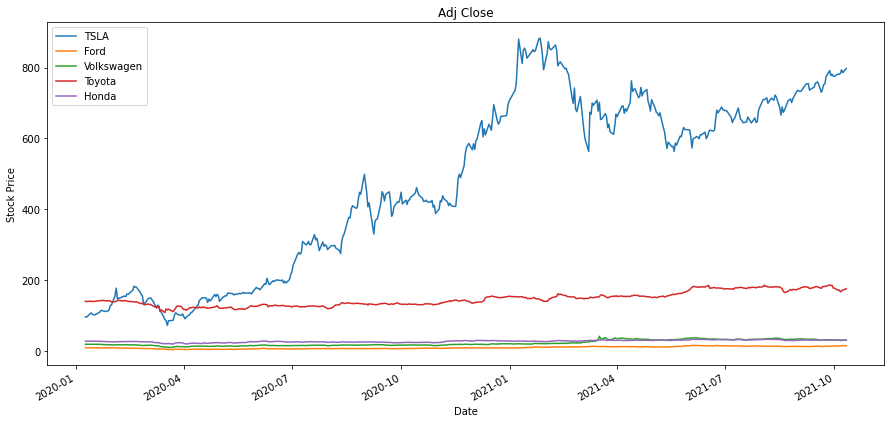

In [4]:
TSLA['Adj Close'].plot(label = 'TSLA', figsize = (15, 7))
F['Adj Close'].plot(label = 'Ford')
VWAGY['Adj Close'].plot(label = 'Volkswagen')
TM['Adj Close'].plot(label = 'Toyota')
HMC['Adj Close'].plot(label = 'Honda')
plt.legend()
plt.title('Adj Close')
plt.ylabel('Stock Price')
plt.show()

#Tesla: increase in Adj Close
#Ford, Volkswagen, Toyota, Honda: stagnant Adj Close
#It looks like Tesla is dominating in terms of stock price

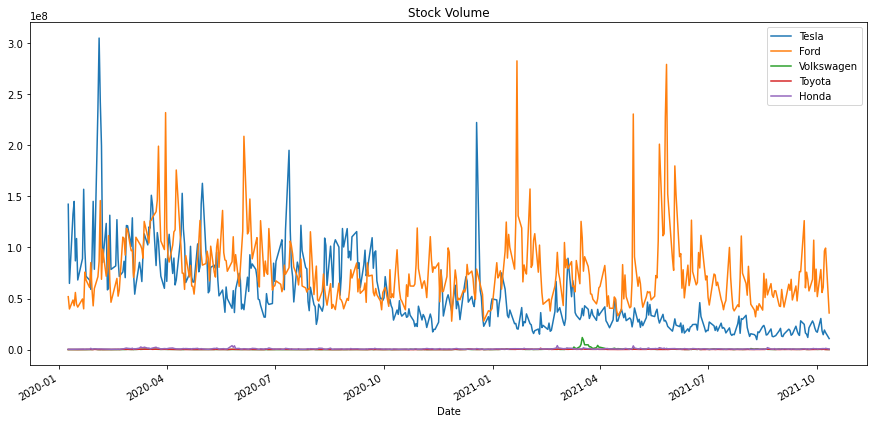

In [5]:

TSLA['Volume'].plot(label = 'Tesla', figsize = (15, 7))
F['Volume'].plot(label = 'Ford')
VWAGY['Volume'].plot(label = 'Volkswagen')
TM['Volume'].plot(label = 'Toyota')
HMC['Volume'].plot(label = 'Honda')
plt.title('Stock Volume')
plt.legend()
plt.show()

#Tesla and Ford: high volatility in stock volume
#Volkwagen, Toyota, Honda: low volatility in stock volume

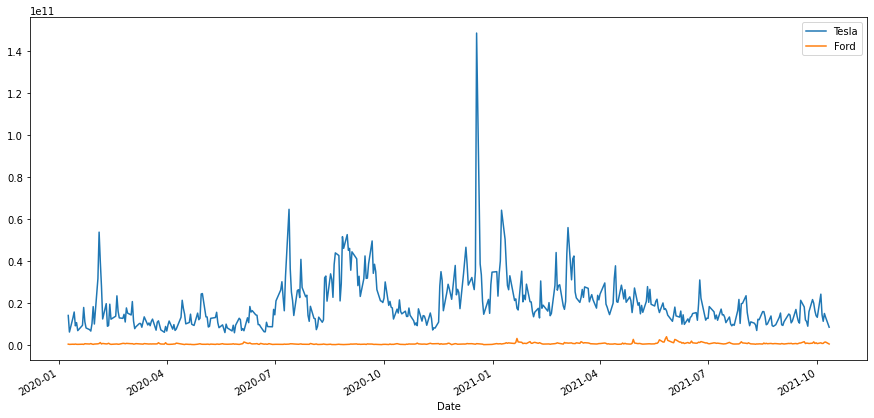

High            6.950000e+02
Low             6.285400e+02
Open            6.689000e+02
Close           6.950000e+02
Volume          2.221262e+08
Adj Close       6.950000e+02
Total Traded    1.485802e+11
Name: 2020-12-18 00:00:00, dtype: float64

In [6]:
#Let's take a closer look at Tesla and Ford
TSLA['Total Traded'] = TSLA['Open'] * TSLA['Volume']
F['Total Traded'] = F['Open'] * F['Volume']

TSLA['Total Traded'].plot(label = 'Tesla', figsize = (15, 7))
F['Total Traded'].plot(label = 'Ford')
plt.legend()
plt.show()

#Tesla dominates in terms of total amount traded
#Let's focus in on that big spike before 2021-01
TSLA.iloc[TSLA['Total Traded'].argmax()]

In [7]:
#Percentage change of closing price for Tesla
percentage_change_TSLA = TSLA['Close'].pct_change()
last_change_TSLA = round(percentage_change_TSLA[-1],4)

#If there is a percentage change for Tesla of 4%, give an alert
if abs(last_change_TSLA) > 0.0004:
    print("Tesla Alert:" + str(last_change_TSLA))

Tesla Alert:0.015


Tesla Alert: MA < Open by at least 50


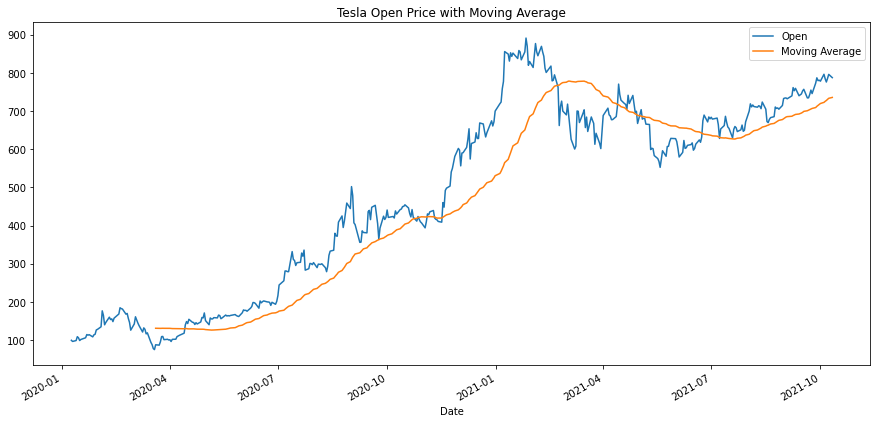

In [8]:
#Let's implement moving averages and see it how it compares to the open price
TSLA['Open'].plot(figsize = (15,7))
TSLA['MA50'] = TSLA['Open'].rolling(50).mean()
TSLA['MA50'].plot(label = 'Moving Average')
plt.title("Tesla Open Price with Moving Average")
plt.legend()

TSLA_MA_Open = TSLA['MA50'][-1] - TSLA['Open'][-1]
if abs(TSLA_MA_Open) >= 50:
    if TSLA_MA_Open <= -50:
        print("Tesla Alert: MA < Open by at least 50")
    elif TSLA_MA_Open >= 50:
        print("Tesla Alert: MA > Open by at least 50")


In [9]:
#Correlation between Tesla and Ford
from pandas.plotting import scatter_matrix

In [10]:
car_comp = pd.concat([TSLA['Open'], F['Open'], TM['Open']], axis = 1)
car_comp.columns = ('Tesla Open', 'Ford Open', 'Toyota Open')

array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Toyota Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Toyota Open', ylabel='Ford Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Toyota Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Toyota Open'>,
        <AxesSubplot:xlabel='Toyota Open', ylabel='Toyota Open'>]],
      dtype=object)

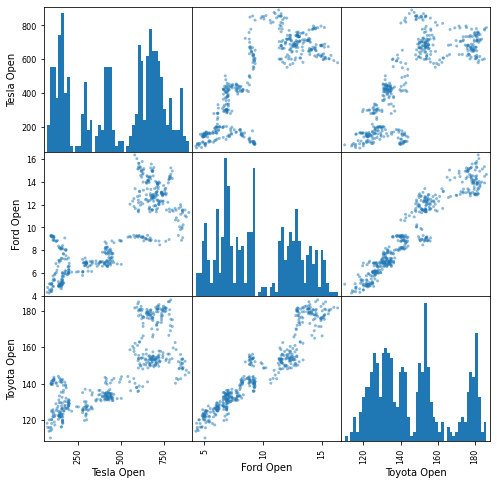

In [11]:
scatter_matrix(car_comp, figsize = (8,8), hist_kwds = {'bins': 50})
#Strong Positive correlation between Ford and Toyota
#Tesla has a nonlinear correlation with Ford  and Toyota

In [12]:
import mplfinance as mpf

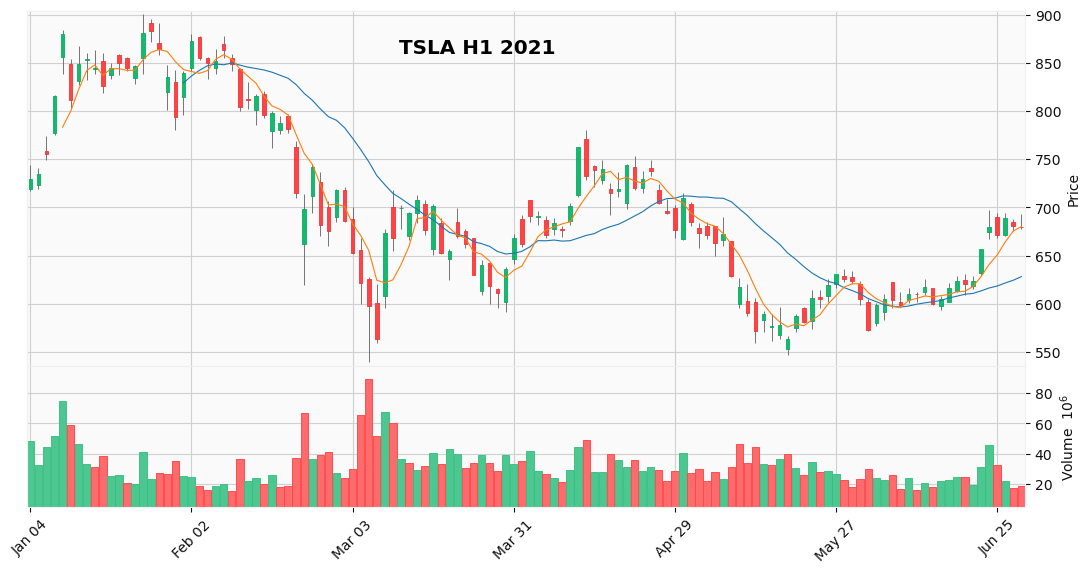

In [17]:
mpf.plot(TSLA['2021-01': '2021-6'], type = 'candle', 
        volume = True, mav =  (20, 5), title = 'TSLA H1 2021',
        tight_layout = True, figratio = (10,5), style = 'yahoo')

In [20]:
#Volatility of Daily Percent Change
# r = (p/p of previous day) - 1

TSLA['Returns'] = (TSLA['Close'] / TSLA['Close'].shift(1)) - 1
F['Returns'] = (F['Close'] / F['Close'].shift(1)) - 1
TM['Returns'] = (TM['Close'] / TM['Close'].shift(1)) - 1
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,Returns
Date,,,,,,,,,
2020-01-09,99.760002,94.573997,99.419998,96.267998,142202000.0,96.267998,1.413772e+10,NaN,NaN
2020-01-10,96.987999,94.739998,96.358002,95.629997,64797500.0,95.629997,6.243758e+09,NaN,-0.006627
2020-01-13,105.125999,98.400002,98.699997,104.972000,132588000.0,104.972000,1.308644e+10,NaN,0.097689
2020-01-14,109.482002,104.980003,108.851997,107.584000,144981000.0,107.584000,1.578147e+10,NaN,0.024883
2020-01-15,107.568001,103.358002,105.952003,103.699997,86844000.0,103.699997,9.201296e+09,NaN,-0.036102


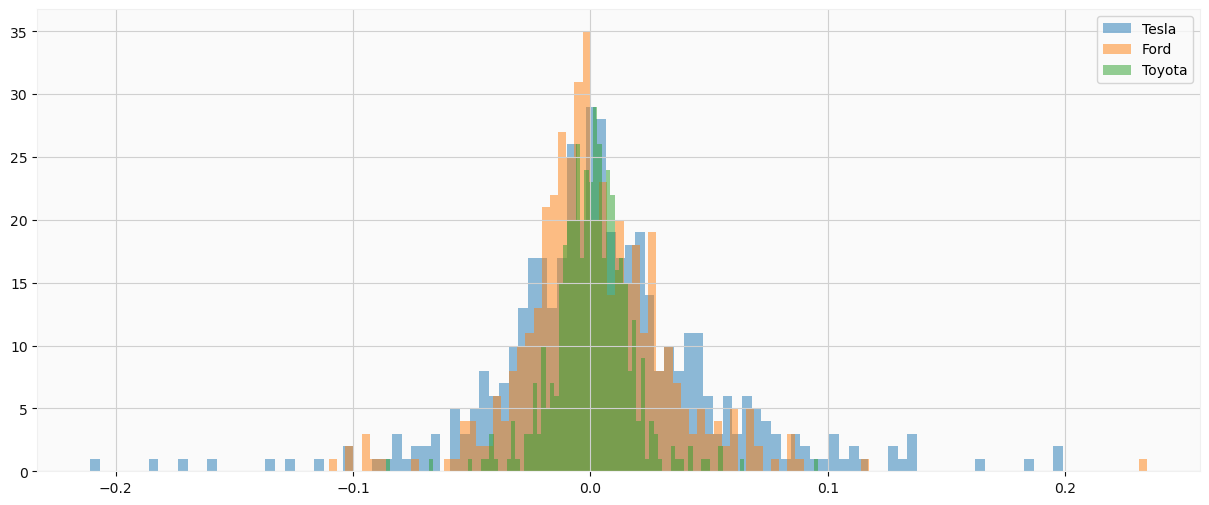

In [24]:
TSLA['Returns'].hist(bins = 100, label = 'Tesla', alpha = 0.5, figsize = (15,6))
F['Returns'].hist(bins = 100, label = 'Ford', alpha = 0.5)
TM['Returns'].hist(bins = 100, label = 'Toyota', alpha = 0.5)
plt.legend()
#Keep in mind that this is not normalized

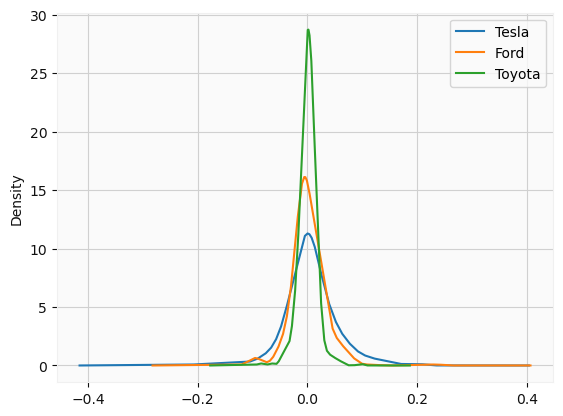

In [27]:
#Kernel Density Estimation to find the fit of the hist
TSLA['Returns'].plot(kind = 'kde', label = 'Tesla')
F['Returns'].plot(kind = 'kde', label = 'Ford')
TM['Returns'].plot(kind = 'kde', label = 'Toyota')
plt.legend()

<AxesSubplot:>

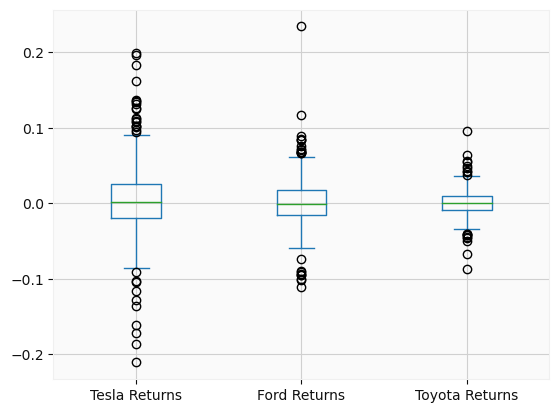

In [31]:
box_df = pd.concat([TSLA['Returns'], F['Returns'], TM['Returns']], axis = 1)
box_df.columns = ['Tesla Returns', 'Ford Returns', 'Toyota Returns']
box_df.plot(kind = 'box')
#The daily percentage change of Tesla is more volatile than Ford and Toyota

array([[<AxesSubplot:xlabel='Tesla Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='Toyota Returns', ylabel='Tesla Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='Toyota Returns', ylabel='Ford Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel='Toyota Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Toyota Returns'>,
        <AxesSubplot:xlabel='Toyota Returns', ylabel='Toyota Returns'>]],
      dtype=object)

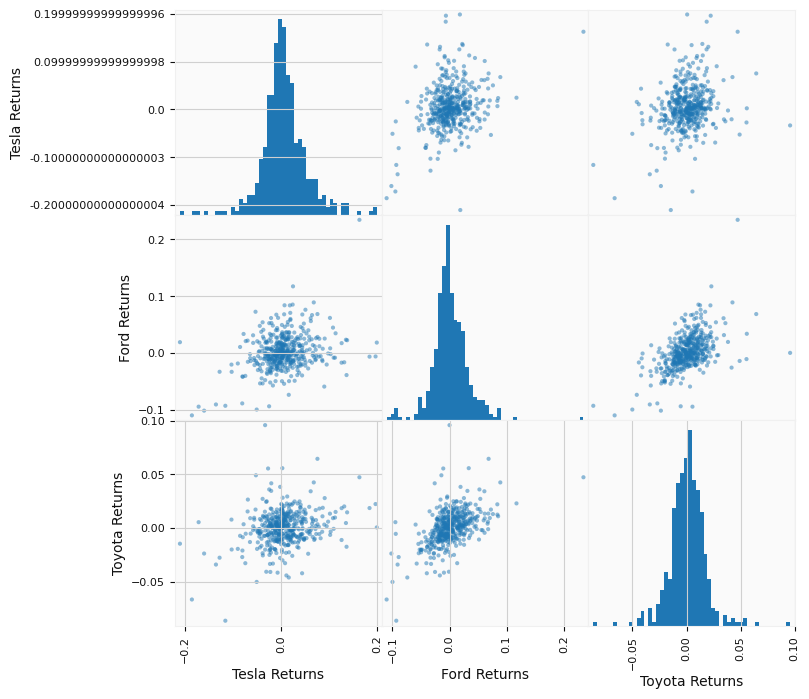

In [34]:
scatter_matrix(box_df, figsize = (8,8), hist_kwds = {'bins': 50}, alpha = 0.5)
#Once again we see that Tesla has no correlation to Ford and Toyota

In [39]:
#Cumulative Return - does not take into account dividends
TSLA['Cumulative Returns'] = (1 + TSLA['Returns']).cumprod()
F['Cumulative Returns'] = (1 + F['Returns']).cumprod()
TM['Cumulative Returns'] = (1 + TM['Returns']).cumprod()
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,Returns,Cumulative Returns
Date,,,,,,,,,,
2020-01-09,99.760002,94.573997,99.419998,96.267998,142202000.0,96.267998,1.413772e+10,NaN,NaN,NaN
2020-01-10,96.987999,94.739998,96.358002,95.629997,64797500.0,95.629997,6.243758e+09,NaN,-0.006627,0.993373
2020-01-13,105.125999,98.400002,98.699997,104.972000,132588000.0,104.972000,1.308644e+10,NaN,0.097689,1.090414
2020-01-14,109.482002,104.980003,108.851997,107.584000,144981000.0,107.584000,1.578147e+10,NaN,0.024883,1.117547
2020-01-15,107.568001,103.358002,105.952003,103.699997,86844000.0,103.699997,9.201296e+09,NaN,-0.036102,1.077201


<AxesSubplot:xlabel='Date'>

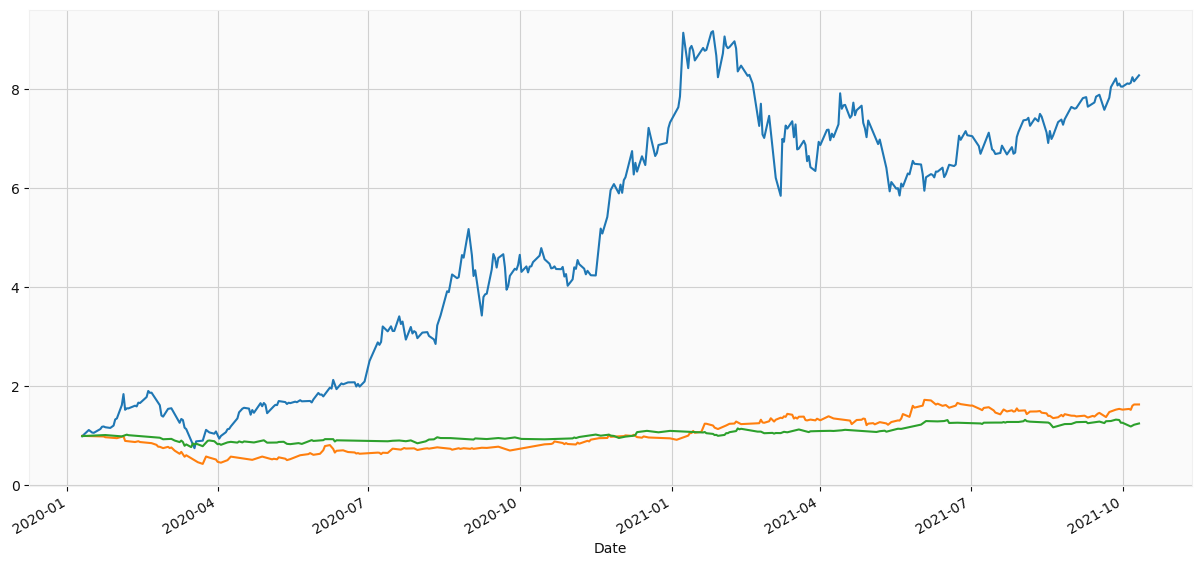

In [40]:
TSLA['Cumulative Returns'].plot(label = 'Tesla', figsize = (15,7))
F['Cumulative Returns'].plot(label = 'Ford')
TM['Cumulative Returns'].plot(label = 'Toyota')
#Tesla shows the highest cumulative return
#If you had invest $1 into Tesla at 2020-01, it would be 
# worth ~ $8 at 2021-10